# Überblick annotierter Bilder

In [1]:
# Import Packages
from Code.find_path_nextcloud import find_path_nextcloud
import matplotlib.pyplot as plt
import spectral as spy
import pandas as pd
import numpy as np
import os

* Funktionen

In [2]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [3]:
def import_labeled_data():

    # Pfad Nextcloud bestimmen
    path_nextcloud = find_path_nextcloud()

    # Festlegung, welches Grid zusammengelegt werden soll
    windowsize_r = 200
    windowsize_c = 200

    # Bestimmung annotation_folder
    grid_folder = path_nextcloud + "Daten_Gyrocopter/Oldenburg/Teilbilder/grid_" + str(windowsize_r) + "_" + str(windowsize_c)
    labeled_folder = grid_folder + '/labeled/'
    # labeled_folder = 'C:/Users/fgrassxx/Desktop/Oldenburg/Oldenburg_grid_200_200/labeled/'
    # Liste aller Dateien in annotation_folder erstellen
    files = os.listdir(labeled_folder)

    # Aus Liste files .hdr Dateien löschen
    for file in files:
        if file.endswith('.dat'):
            files.remove(file)

    files.remove('wrong_image_size')
    files.remove('old')


    # Spaltennamen des DataFrames bilden
    path_dat = labeled_folder + os.path.splitext(files[0])[0] + '.dat'
    path_hdr = labeled_folder + os.path.splitext(files[0])[0] + '.hdr'

    # load image
    img = spy.envi.open(file=path_hdr, image=path_dat)

    # convert only wavelength into dataframe and round numbers
    value_bands = ['hsi_band_' + str(int(float(x))) + '_nm' for x in img.metadata['wavelength'] if isfloat(x)]
    value_bands.extend(['thermal', 'dom'])

    label_bands = ['label']

    bands = []
    bands.extend(value_bands)
    bands.extend(label_bands)
    bands.append('picture_name')

    df_annotations = pd.DataFrame(columns=bands)

    # labeled Bilder erstellen
    for filename in files:
        path_dat = labeled_folder + os.path.splitext(filename)[0] + '.dat'
        path_hdr = labeled_folder + os.path.splitext(filename)[0] + '.hdr'
        img = spy.envi.open(file=path_hdr, image=path_dat)

        arr = img.load()

        df = pd.DataFrame(arr.reshape(((arr.shape[0]*arr.shape[1]), arr.shape[2])), columns=bands[:-1])
        df['picture_name'] = os.path.splitext(filename)[0]

        df_annotations = pd.concat([df_annotations, df], ignore_index=True)

        df_annotations['label'] = df_annotations['label'].astype(int)


    return df_annotations


In [4]:
df_annotations = import_labeled_data()

**Wie viele Pixel umfassen die annotiert Bilder insgesamt?**

In [5]:
df_annotations.shape[0]

1320000

**Wie viele Pixel wurden in den Bildern insgesamt annotiert?**

In [6]:
df_objects = df_annotations.loc[df_annotations['label'] != 0, ]
df_objects.shape[0]

1005611

**Wie viel Prozent der Pixel enthalten eine Klasse ungleich None?**

In [7]:
str((df_objects.shape[0] / df_annotations.shape[0]*100).__round__(1)) + ' %'

'76.2 %'

**Wie viel Prozent der Pixel wurden pro Bild annotiert?**

In [8]:
w = df_objects[['picture_name']].groupby(['picture_name'], as_index = False).size()
w['percent'] = (w['size'] / 40000 * 100).__round__(1)
w

,picture_name,size,percent
0,Teilbild_Oldenburg_00000000_00000000_0_0_,32272,80.7
1,Teilbild_Oldenburg_00000000_00000002_0_400_,34865,87.2
2,Teilbild_Oldenburg_00000000_00000008_0_1600_,21559,53.9
3,Teilbild_Oldenburg_00000000_00000009_0_1800_,37953,94.9
4,Teilbild_Oldenburg_00000000_00000011_0_2200_,34791,87.0
5,Teilbild_Oldenburg_00000000_00000012_0_2400_,36382,91.0
6,Teilbild_Oldenburg_00000000_00000013_0_2600_,33635,84.1
7,Teilbild_Oldenburg_00000000_00000014_0_2800_,27305,68.3
8,Teilbild_Oldenburg_00000000_00000015_0_3000_,26049,65.1
9,Teilbild_Oldenburg_00000001_00000000_200_0_,36360,90.9


**Wie sehen die Annotationen auf den Bildern aus?**

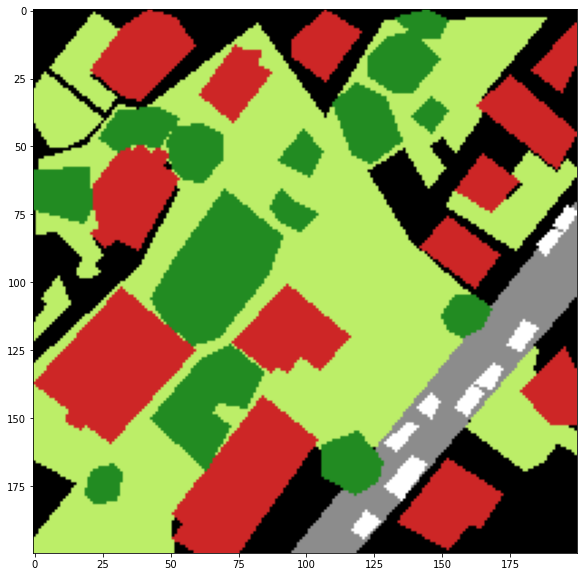

In [23]:
for image_name in df_annotations['picture_name'].unique()[:1]:
    image = df_annotations.loc[df_annotations['picture_name'] == image_name, ]
    image = image.drop(columns=['picture_name'])

    # convert annotation ID to color
    df = pd.DataFrame()
    df['color'] = image['label'].map(
        {0.0: [0, 0, 0],        # schwarz
         1.0: [188, 238, 104],  # hellgrün -> Wiese
         2.0: [140, 140, 140],  # grau -> Straße
         3.0: [255, 255, 255],
         4.0: [255, 255, 255],
         5.0: [255, 20, 147],   # pink -> Schienen
         6.0: [205, 38, 38],    # rot -> Haus
         7.0: [34, 139, 34]     # dunkelgrün -> Wald
    })

    # ['None', 'Wiese','Straße','Schienen','Haus','Wald']
    df['color1'] = df['color'].apply(lambda x: x[0])
    df['color2'] = df['color'].apply(lambda x: x[1])
    df['color3'] = df['color'].apply(lambda x: x[2])

    img_arr = np.array(df[['color1', 'color2', 'color3']])
    img_arr = np.reshape(img_arr, (200, 200, 3))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img_arr)
    plt.show()
    # fig.savefig(image_name)